In [1]:
import numpy as np
from os import getcwd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_path= f'{getcwd()}\mnist_train.csv'
validation_data_path= f'{getcwd()}\mnist_test.csv'

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        ndata=np.loadtxt(training_file, delimiter=',', skiprows=1)
        labels=ndata[:,0].astype(int)
        images=ndata[:,1:].astype(float).reshape((ndata.shape[0],28,28))
        ndata=None
    return images,labels

In [4]:
training_images,training_labels=get_data(train_data_path)
validation_images,validation_data=get_data(validation_data_path)

In [5]:
print(training_images.shape)
print(validation_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
training_images=np.expand_dims(training_images,axis=3)
validation_images=np.expand_dims(validation_images,axis=3)

In [7]:
print(training_images.shape)
print(validation_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [22]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=2,
                                 height_shift_range=0.002,
                                 width_shift_range=0.002,
                                 zoom_range=0.002,
                                 shear_range=0.002,
                                 horizontal_flip=True,
                                 fill_mode="nearest")
validation_datagen=ImageDataGenerator(rescale=1./255)

In [23]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [25]:
history=model.fit_generator(generator=train_datagen.flow(training_images,
                                                        training_labels,
                                                        batch_size=10),
                           validation_data=validation_datagen.flow(validation_images,
                                                                  validation_data,
                                                                  batch_size=10),
                           epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6000 steps, validate for 1000 steps
Epoch 1/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.8552 - acc: 0.7291 - val_loss: 0.4530 - val_acc: 0.8498
Epoch 2/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.4005 - acc: 0.8718 - val_loss: 0.3329 - val_acc: 0.8899
Epoch 3/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.3218 - acc: 0.8984 - val_loss: 0.2669 - val_acc: 0.9127
Epoch 4/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.2746 - acc: 0.9136 - val_loss: 0.2462 - val_acc: 0.9231
Epoch 5/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.2436 - acc: 0.9239 - val_loss: 0.2239 - val_acc: 0.9282
Epoch 6/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.2237 - acc: 0.9315 - val_loss: 0.1964 - val_acc: 0.9403
Epoch 7/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.2071 - acc: 0.9

In [20]:
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
import matplotlib.pyplot as plt

In [27]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

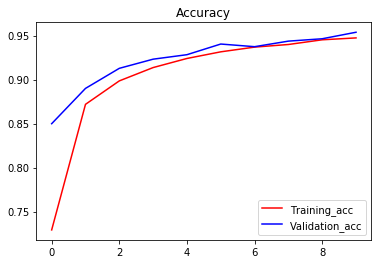

<Figure size 432x288 with 0 Axes>

In [30]:
epoch=range(len(acc))
plt.plot(epoch,acc,'r',label='Training_acc')
plt.plot(epoch,val_acc,'b',label='Validation_acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.show()

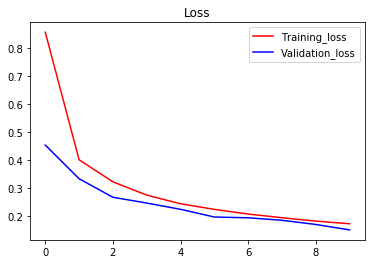

<Figure size 432x288 with 0 Axes>

In [31]:
epoch=range(len(acc))
plt.plot(epoch,loss,'r',label='Training_loss')
plt.plot(epoch,val_loss,'b',label='Validation_loss')
plt.title('Loss')
plt.legend()
plt.figure()
plt.show()